## Herd immunity calculator
**Philip Machanick**\
*17 April 2020*

Assumes fixed value of $R_0$, assuming $E=1$, i.e., immunity is 100% post-recovery (or post-vaccination if one exists).

Calculated as
$$
P_{herd} = 1 - \frac{1}{1-R_{0}}
$$

Where $R_0$ is the basic reproduction ratio, i.e., the mean number of new infections per infected person.

To run the example graphing exponential growth in the US as of 20 March 2020, choose Open… in the File menu and open the notebook “US worst case.ipynb”.

**Reference**\
Paul Fine, Ken Eames, and David L Heymann. “Herd immunity”: a rough guide. *Clinical Infectious Diseases*, 52(7):911–916, 2011

In [39]:
%%capture
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [40]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [41]:
# set up parameters
R0min = 1
R0max = 10
R0stepsize = 0.01
E = 1;  # effectiveness of vaccine: 1 = 100%

In [42]:
R0vals = np.arange (R0min, R0max, R0stepsize)
def herdThreshold (R0):
    return 1-1/R0;

herdThresholdVals = herdThreshold (R0vals)

# uncomment to see values
# print (herdThresholdVals);

In [51]:
print(herdThreshold (2.5));
print(herdThreshold (4));
# https://stackoverflow.com/questions/5306756/how-to-print-a-percentage-value-in-python
print ('{:.0%}'.format(herdThreshold (1.3)))

0.6
0.75
23%


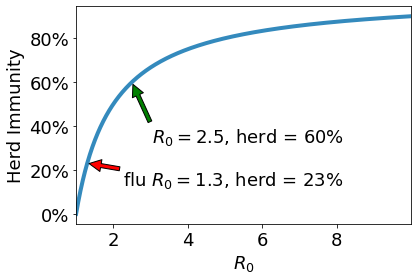

In [49]:
plt.autoscale(enable=True, axis='x', tight=True)
plt.rcParams.update({'font.size': 18})
plt.plot(R0vals, herdThresholdVals, '-', color="#348ABD", label='$Herd Immunity$', lw=4)
plt.xlabel('$R_0$')
plt.ylabel('Herd Immunity')

# https://stackoverflow.com/questions/31357611/format-y-axis-as-percent
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 

# https://matplotlib.org/tutorials/text/annotations.html
# https://stackoverflow.com/questions/16948256/cannot-concatenate-str-and-float-objects
plt.annotate('flu $R_0=1.3$, herd = ' + '{:.0%}'.format(herdThreshold(1.3)),xy=(1.3,herdThreshold(1.3)), xycoords='data',xytext=(0.8, 0.25), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
plt.annotate('$R_0=2.5$, herd = ' + '{:.0%}'.format(herdThreshold(2.5)),xy=(2.5,herdThreshold(2.5)), xycoords='data',xytext=(0.8, 0.45), textcoords='axes fraction',
            arrowprops=dict(facecolor='green', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

#https://stackoverflow.com/questions/21288062/second-y-axis-label-getting-cut-off
#plt.savefig("/Users/philip/Desktop/herdimmunity.pdf", bbox_inches='tight');